# Machine Learning- Telecom Customers Churn Prediction

Understanding The Business problem:

1.Telecom service providers use customer attrition analysis as one of their key business metrics
because the cost of retaining an existing customer is far less than acquiring a new one.

2.Machine Learning algorithms help companies analyze customer attrition rate based on several factors which includes various services subscribed by the customers, tenure rate, gender, senior citizen, payment method, etc.

3.In this project, we will train several classification algorithms namely Logistic Regression, Support Vector Machine, K-Nearest Neighbors, and Random Forest Classifier to predict the churn rate of Telecommunication Customers.

### Import required libraries 

In [48]:
# cufflinks is a 3rd party Wrapper library
!pip install cufflinks
!pip install jupyterthemes

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [50]:
# Read the CSV file 
df = pd.read_csv("C:\\Users\\saman\\OneDrive\\Desktop\\telecom_churn.csv")

In [51]:
# Load the top 5 instances
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [52]:
# Load the bottom 5 instances 
df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [53]:
# Check the shape of the dataframe
df.shape

(5000, 21)

In [54]:
# Display the feature columns
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [55]:
# Obtain the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [56]:
# maximum daily minutes using pandas
maxdaily =df['total_day_minutes'].max()
maxdaily

351.5

In [57]:
# average daily minutes using numpy
avgmin=np.mean(df['total_day_minutes'])
avgmin

180.2888999999998

In [58]:
# Statics for data
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### Data visualization

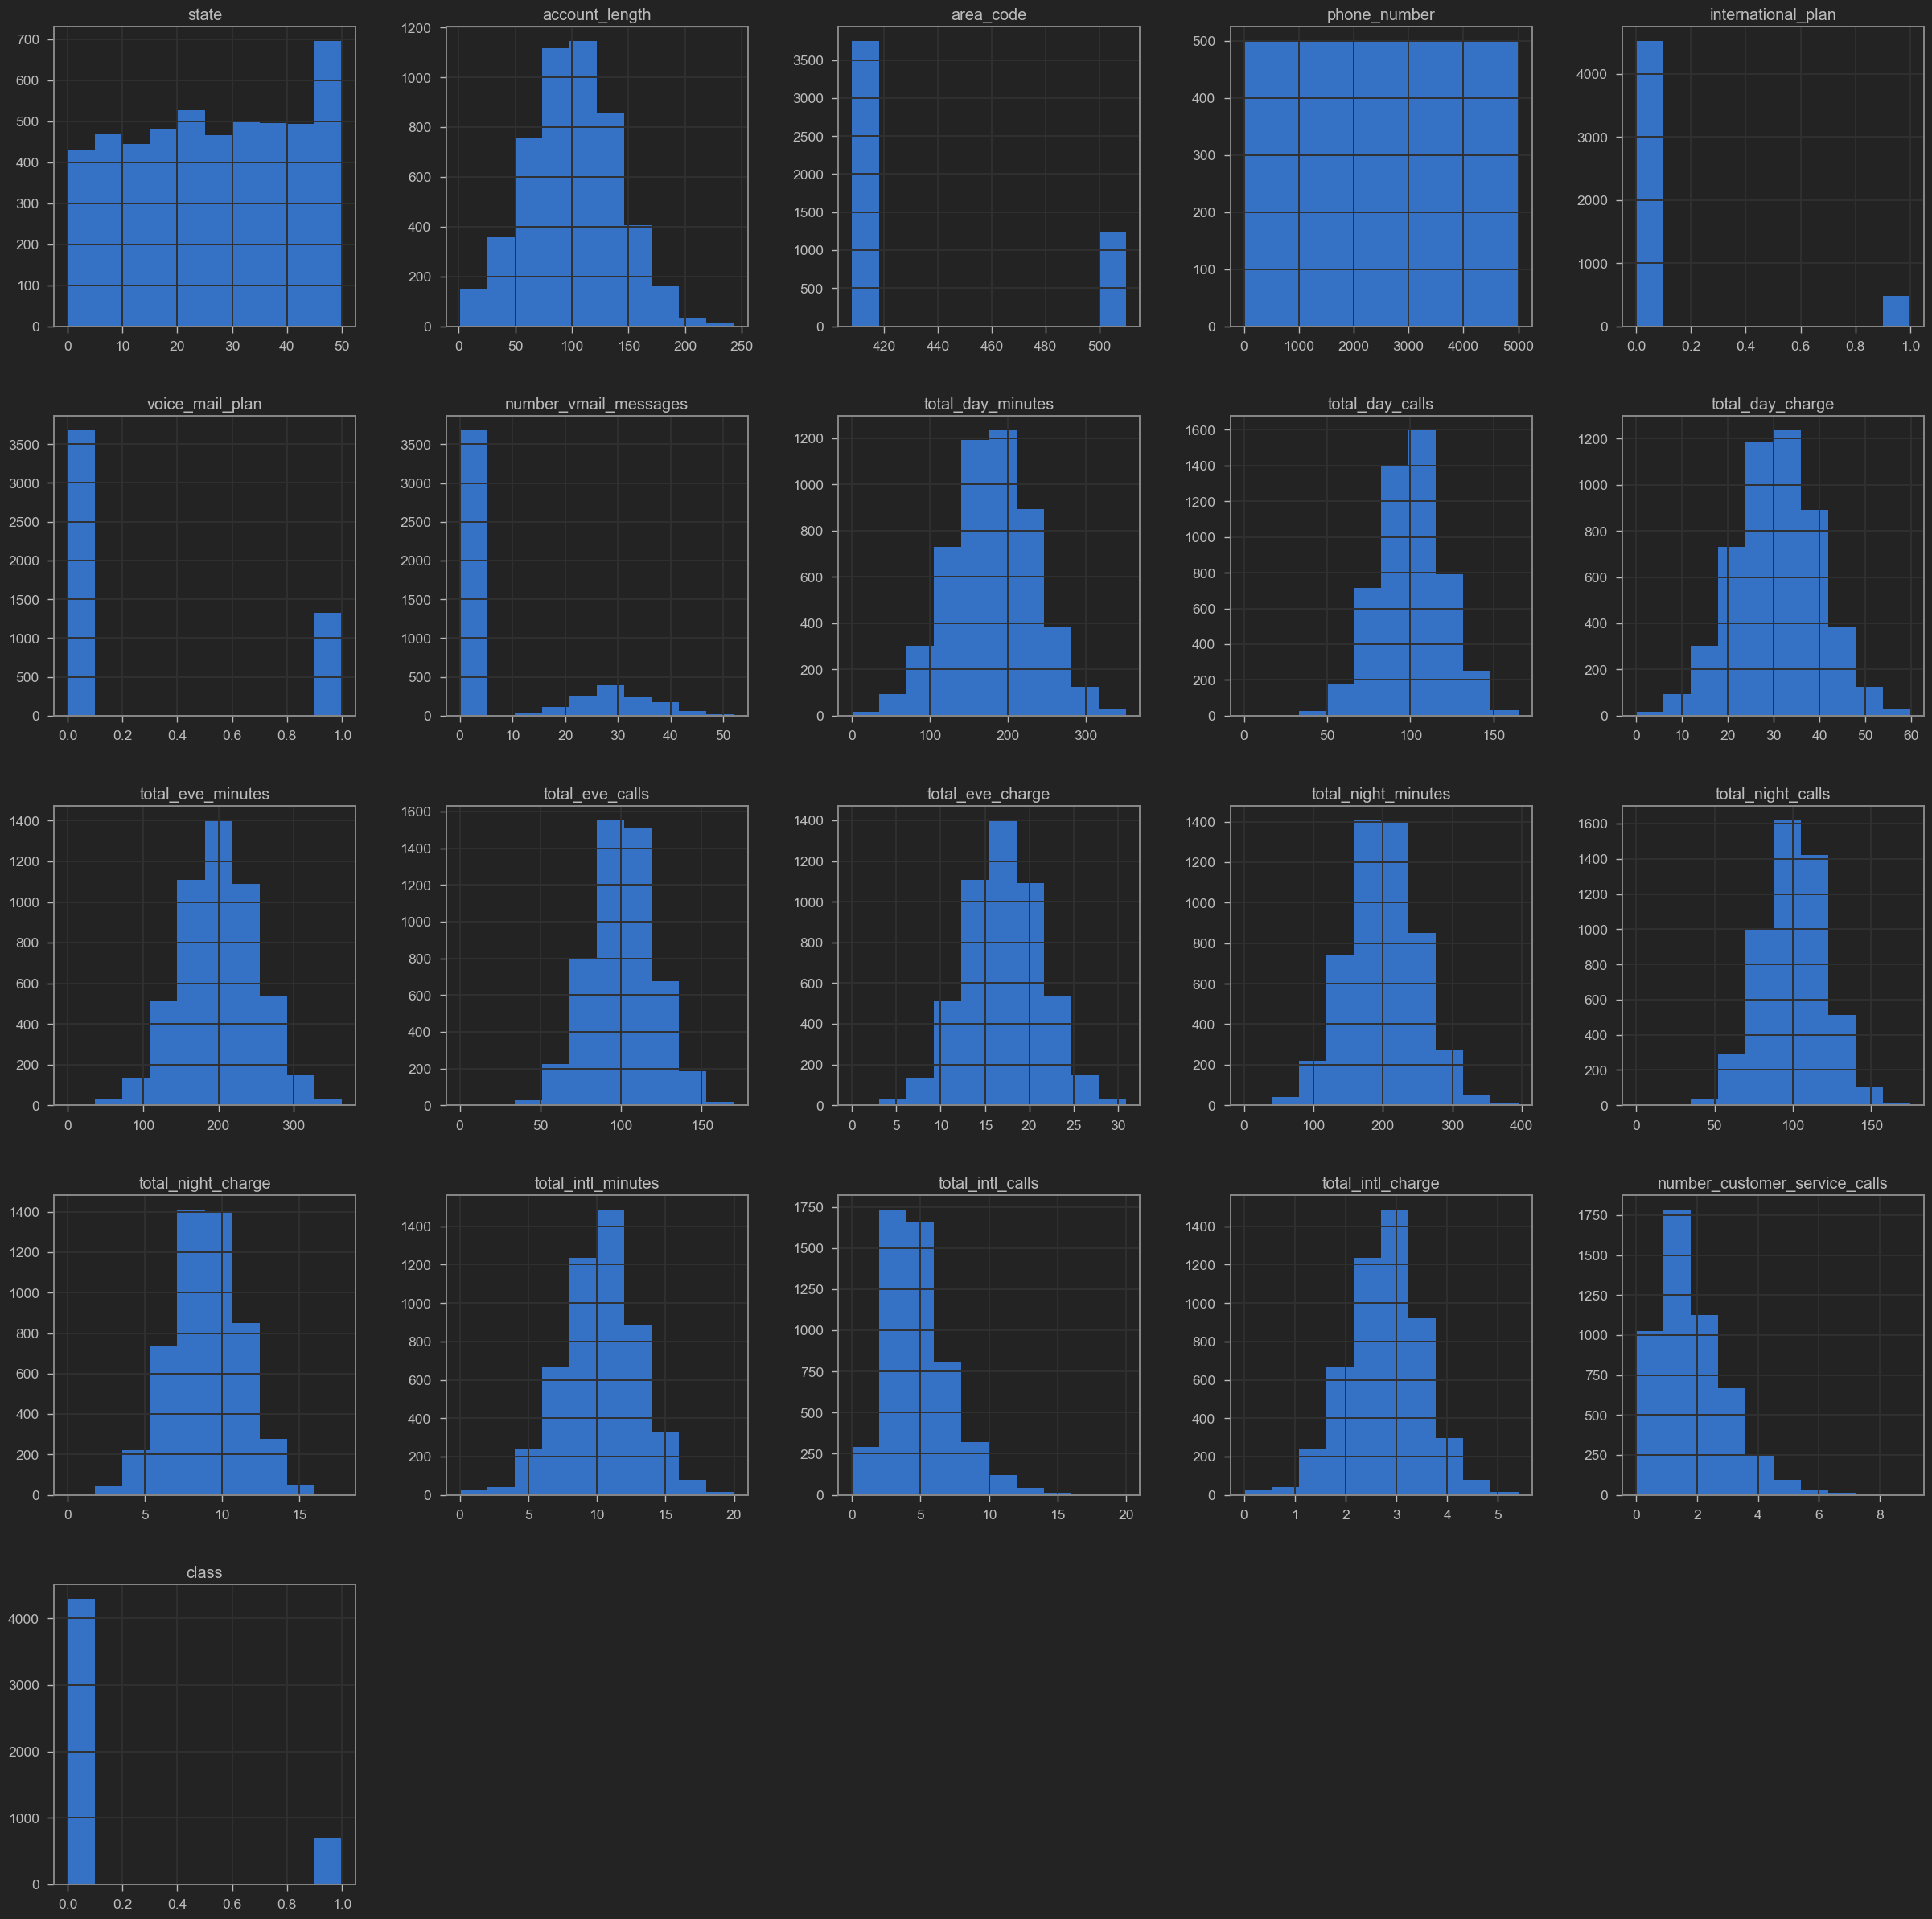

In [59]:
df.hist(figsize=(30,30))
plt.show()

In [60]:
df.head(1)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [61]:
df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [62]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram
import plotly.graph_objects as go

In [63]:
fig = go.Figure(data = go.Pie(labels=['Retained (0)','Exited (1)'],values = df['class'].value_counts()))
fig.show()

In [67]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained

fig = px.histogram(df, x='international_plan',color='class')
fig.show()

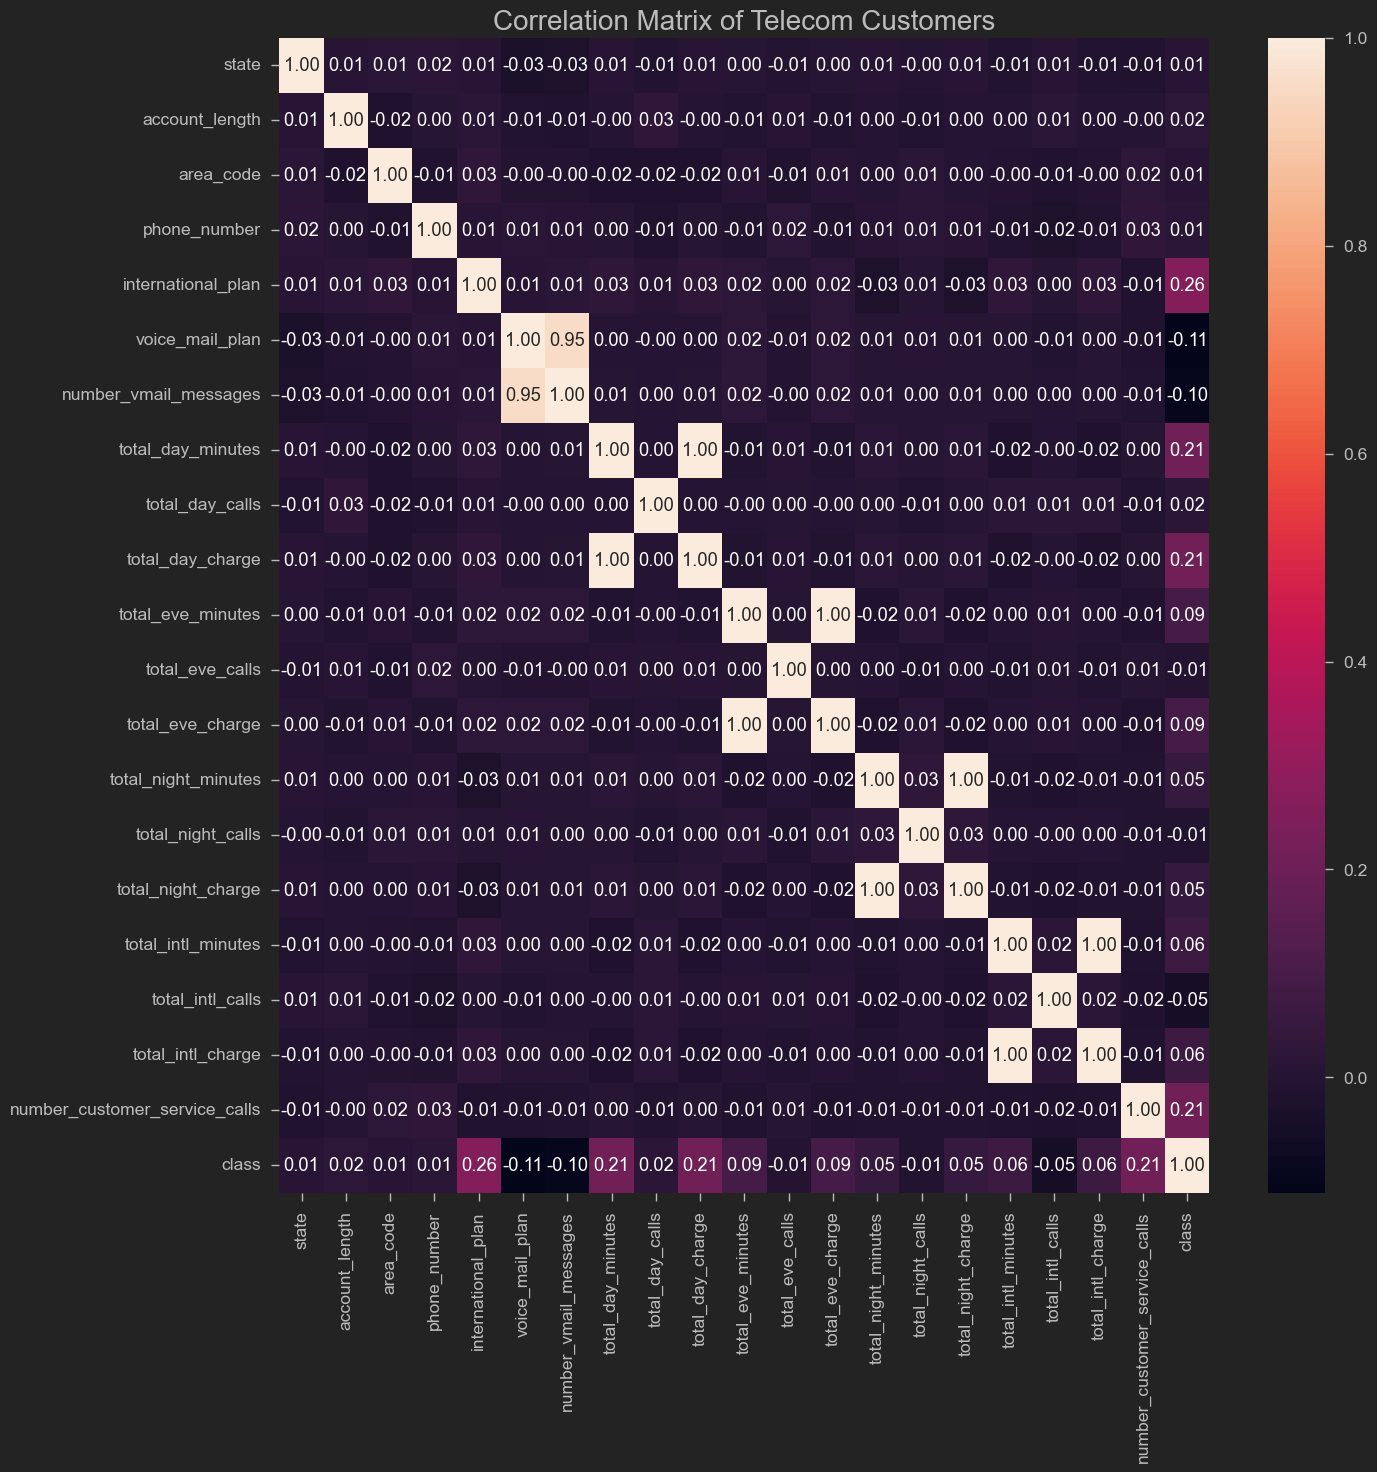

In [72]:
# Correlation Matrix

corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot= True,fmt = '0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

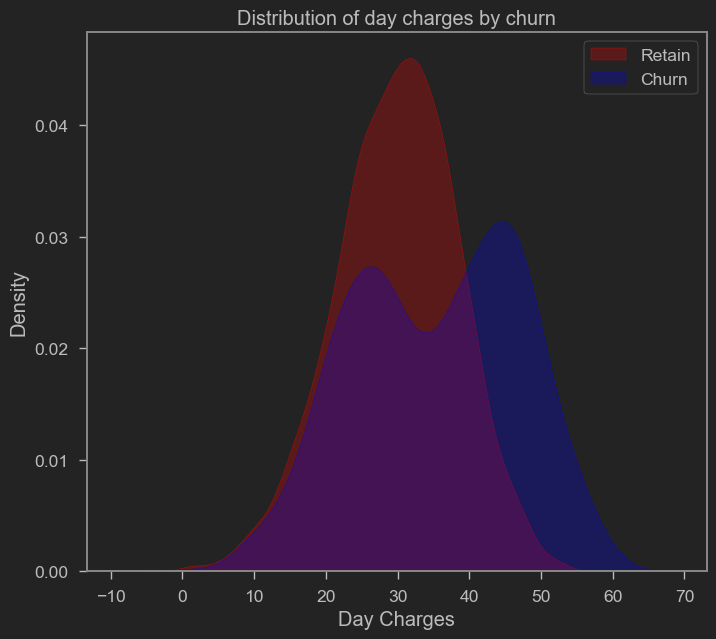

In [75]:
# Churn by day charges
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 0)],
               color = "Red", fill = True)
ax = sns.kdeplot(df.total_day_charge[(df["class"] == 1)],
               color = "Blue", fill = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

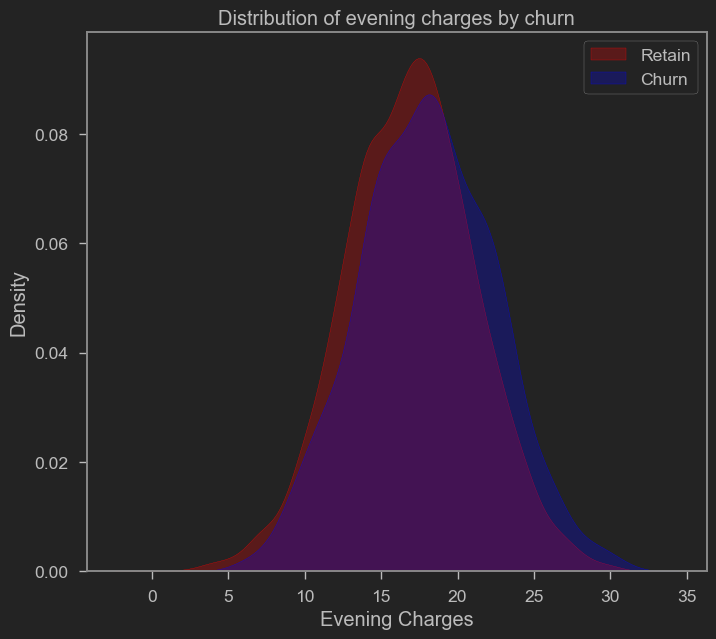

In [76]:
# Churn by evening charges
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 0)],
               color = "Red", fill = True)
ax = sns.kdeplot(df.total_eve_charge[(df["class"] == 1)],
               color = "Blue", fill = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

In [78]:
# Plot histogram graph for the voice mail plan service used by the Telecom customers with respect to churned/Retained

fig = px.histogram(df, x='voice_mail_plan',color='class')
fig.show()

### IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING

In [79]:
X = df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = df["class"]

In [80]:
X

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,49,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,7,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,7,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [81]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

In [82]:
X.shape

(5000, 18)

In [83]:
y.shape

(5000,)

In [177]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [178]:
X_train.shape

(3500, 18)

In [179]:
X_test.shape

(1500, 18)

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

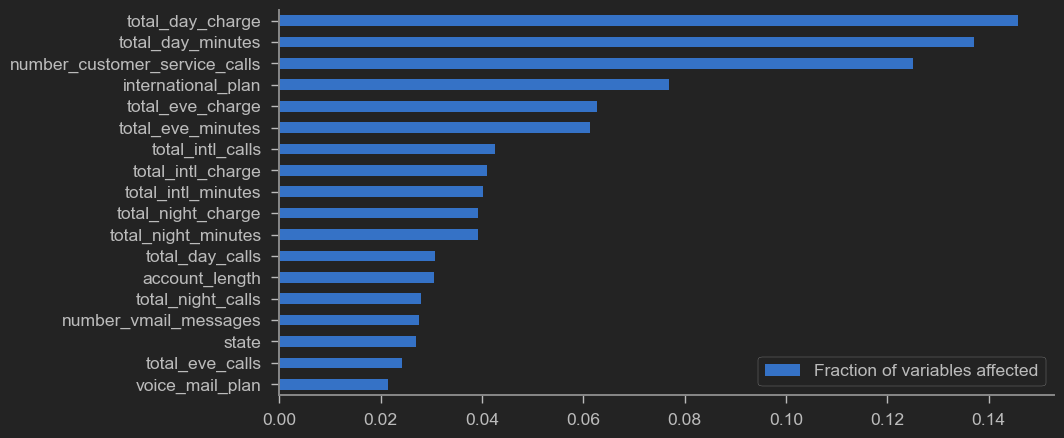

In [181]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [182]:
# Using Logistic regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

C:\Users\saman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [183]:
y_predict = model_LR.predict(X_test)

In [184]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1300
           1       0.58      0.10      0.16       200

    accuracy                           0.87      1500
   macro avg       0.73      0.54      0.55      1500
weighted avg       0.84      0.87      0.83      1500



<AxesSubplot: >

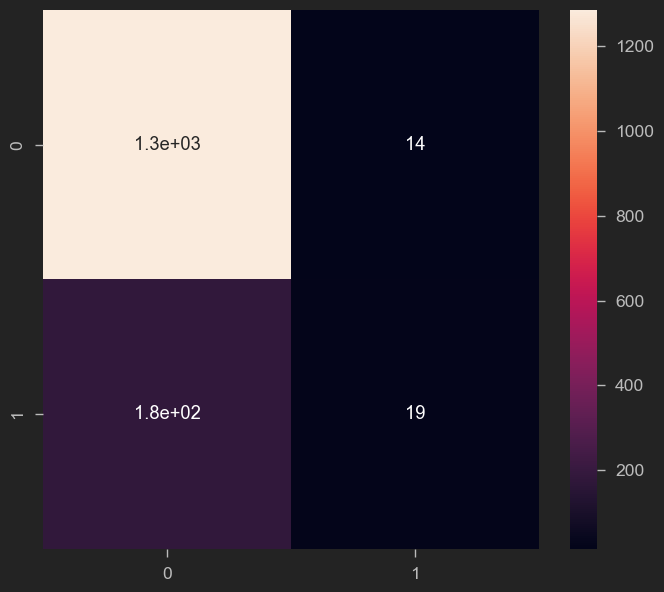

In [185]:
# Print out the confusion Matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot = True)

###  TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [186]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter = 5000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

C:\Users\saman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\saman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\saman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\saman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\saman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(estimator=LinearSVC(max_iter=5000))

In [188]:
y_predict = model_svm.predict(X_test)

In [189]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1300
           1       0.64      0.08      0.14       200

    accuracy                           0.87      1500
   macro avg       0.76      0.54      0.54      1500
weighted avg       0.84      0.87      0.83      1500



<AxesSubplot: >

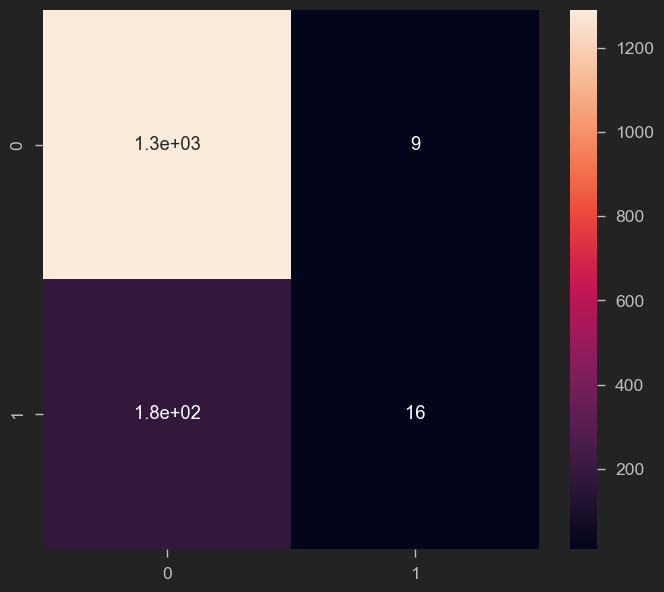

In [190]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot = True)

In [193]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [196]:
y_predict = model_rf.predict(X_test)

In [197]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1300
           1       0.94      0.70      0.81       200

    accuracy                           0.95      1500
   macro avg       0.95      0.85      0.89      1500
weighted avg       0.95      0.95      0.95      1500



<AxesSubplot: >

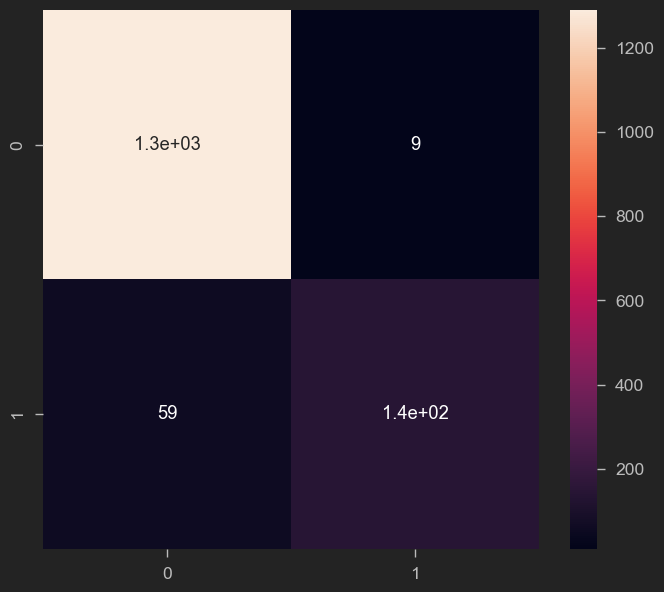

In [198]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

### TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [199]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [200]:
y_predict = model_KNN.predict(X_test)

In [201]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1300
           1       0.76      0.29      0.42       200

    accuracy                           0.89      1500
   macro avg       0.83      0.64      0.68      1500
weighted avg       0.88      0.89      0.87      1500



<AxesSubplot: >

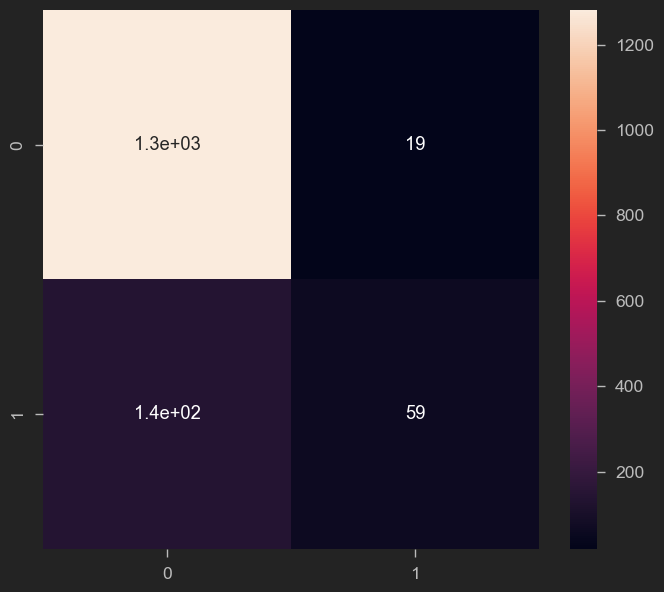

In [202]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

### TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [203]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [204]:
y_predict = model_nb.predict(X_test)

In [205]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1300
           1       0.55      0.59      0.57       200

    accuracy                           0.88      1500
   macro avg       0.75      0.76      0.75      1500
weighted avg       0.89      0.88      0.88      1500



<AxesSubplot: >

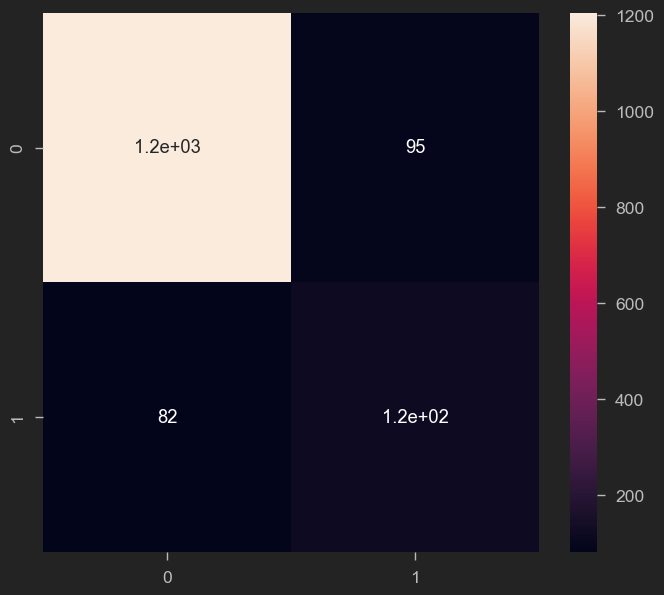

In [206]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True)

### PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

In [207]:
model_LR.predict_proba(X_test)

array([[0.84767749, 0.15232251],
       [0.95078155, 0.04921845],
       [0.846547  , 0.153453  ],
       ...,
       [0.53165674, 0.46834326],
       [0.82758129, 0.17241871],
       [0.73320013, 0.26679987]])

In [208]:
model_LR.predict_proba(X_test)[:, 1]

array([0.15232251, 0.04921845, 0.153453  , ..., 0.46834326, 0.17241871,
       0.26679987])

In [209]:
y_test

970     0
4775    0
4039    0
373     0
2535    1
       ..
4578    0
213     0
2395    0
4220    0
961     0
Name: class, Length: 1500, dtype: int64

In [211]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [212]:
fpr1

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.69230769e-04,
       7.69230769e-04, 1.53846154e-03, 1.53846154e-03, 3.07692308e-03,
       3.07692308e-03, 6.15384615e-03, 6.15384615e-03, 8.46153846e-03,
       8.46153846e-03, 1.07692308e-02, 1.07692308e-02, 1.30769231e-02,
       1.30769231e-02, 1.38461538e-02, 1.38461538e-02, 1.76923077e-02,
       1.76923077e-02, 1.84615385e-02, 1.84615385e-02, 1.92307692e-02,
       1.92307692e-02, 2.00000000e-02, 2.00000000e-02, 2.15384615e-02,
       2.15384615e-02, 2.30769231e-02, 2.30769231e-02, 2.61538462e-02,
       2.61538462e-02, 2.92307692e-02, 2.92307692e-02, 3.23076923e-02,
       3.23076923e-02, 3.46153846e-02, 3.46153846e-02, 3.53846154e-02,
       3.53846154e-02, 3.69230769e-02, 3.69230769e-02, 3.84615385e-02,
       3.84615385e-02, 4.69230769e-02, 4.69230769e-02, 4.84615385e-02,
       4.84615385e-02, 4.92307692e-02, 4.92307692e-02, 5.30769231e-02,
       5.30769231e-02, 5.69230769e-02, 5.69230769e-02, 5.84615385e-02,
      

In [213]:
tpr1

array([0.   , 0.005, 0.02 , 0.02 , 0.03 , 0.03 , 0.035, 0.035, 0.055,
       0.055, 0.06 , 0.06 , 0.095, 0.095, 0.11 , 0.11 , 0.115, 0.115,
       0.125, 0.125, 0.13 , 0.13 , 0.135, 0.135, 0.145, 0.145, 0.15 ,
       0.15 , 0.155, 0.155, 0.16 , 0.16 , 0.175, 0.175, 0.185, 0.185,
       0.195, 0.195, 0.2  , 0.2  , 0.205, 0.205, 0.21 , 0.21 , 0.23 ,
       0.23 , 0.235, 0.235, 0.24 , 0.24 , 0.245, 0.245, 0.255, 0.255,
       0.27 , 0.27 , 0.275, 0.275, 0.28 , 0.28 , 0.285, 0.285, 0.29 ,
       0.29 , 0.295, 0.295, 0.3  , 0.3  , 0.315, 0.315, 0.32 , 0.32 ,
       0.325, 0.325, 0.33 , 0.33 , 0.335, 0.335, 0.34 , 0.34 , 0.345,
       0.345, 0.35 , 0.35 , 0.365, 0.365, 0.37 , 0.37 , 0.375, 0.375,
       0.38 , 0.38 , 0.385, 0.385, 0.39 , 0.39 , 0.395, 0.395, 0.4  ,
       0.4  , 0.43 , 0.43 , 0.445, 0.445, 0.45 , 0.45 , 0.455, 0.455,
       0.465, 0.465, 0.47 , 0.47 , 0.475, 0.475, 0.48 , 0.48 , 0.49 ,
       0.49 , 0.5  , 0.5  , 0.505, 0.505, 0.51 , 0.51 , 0.515, 0.515,
       0.52 , 0.52 ,

In [214]:
thresh1

array([1.89529674, 0.89529674, 0.71284182, 0.70664033, 0.68384367,
       0.68012701, 0.65889753, 0.65319996, 0.60813456, 0.56337139,
       0.56164252, 0.54487101, 0.50900388, 0.50279897, 0.49216049,
       0.48630996, 0.48579419, 0.48356105, 0.4726797 , 0.46065695,
       0.45745209, 0.45603242, 0.45583121, 0.45387704, 0.45054859,
       0.45026698, 0.44895355, 0.44794974, 0.44282547, 0.43692056,
       0.43136598, 0.42052783, 0.40122276, 0.39390675, 0.39302205,
       0.39077628, 0.38715347, 0.38508168, 0.38331509, 0.38213584,
       0.38174078, 0.38030455, 0.37679059, 0.3756596 , 0.36624267,
       0.35375013, 0.35064752, 0.34549813, 0.34441313, 0.34427311,
       0.34319655, 0.34149176, 0.33426446, 0.32438013, 0.31976335,
       0.31761737, 0.31753266, 0.31403891, 0.31366349, 0.31037191,
       0.30991415, 0.30874957, 0.30847966, 0.30709713, 0.30631912,
       0.30501716, 0.30271636, 0.30167825, 0.30075273, 0.29312336,
       0.29264495, 0.28724777, 0.28392331, 0.28317803, 0.28301

In [219]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_KNN.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_nb.predict_proba(X_test)[:, 1], pos_label = 1)


In [223]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_KNN.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_nb.predict_proba(X_test)[:, 1])
                                
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7531307692307692
Support Vector Machine:  0.8138653846153846
Random Forest:  0.9262076923076924
K-Nearest Neighbors:  0.7188865384615384
Naive Bayes:  0.8711846153846153


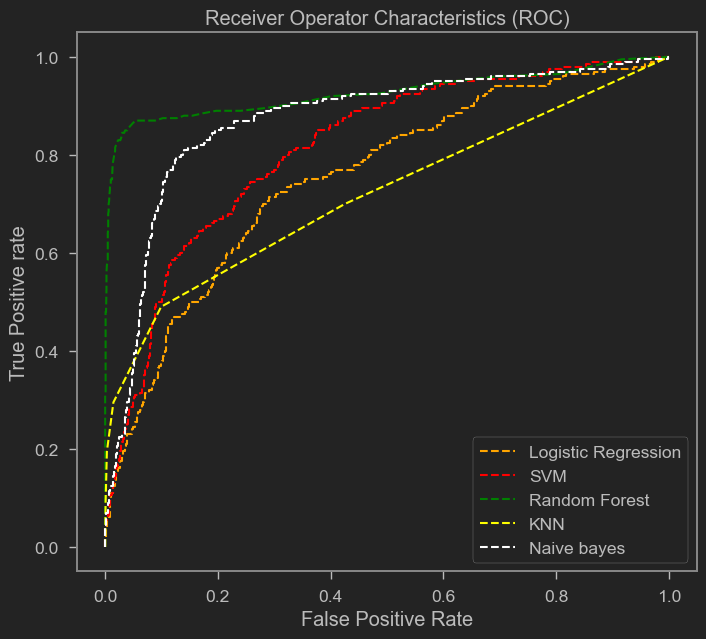

In [228]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()